# ARIMA

### MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

### LOAD DATA

In [2]:
path = "behavior_of_the_urban_traffic_of_the_city_of_sao_paulo_in_brazil.csv"
df = pd.read_csv(path, delimiter=";", decimal=",")
df

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4


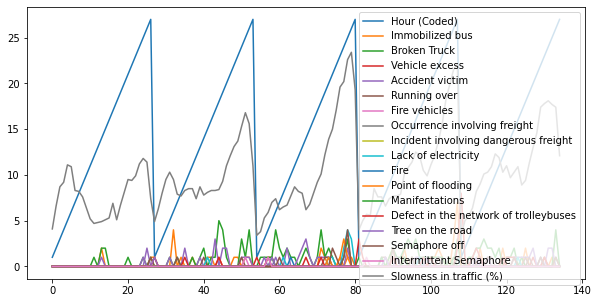

In [3]:
df.plot(figsize=(10, 5))

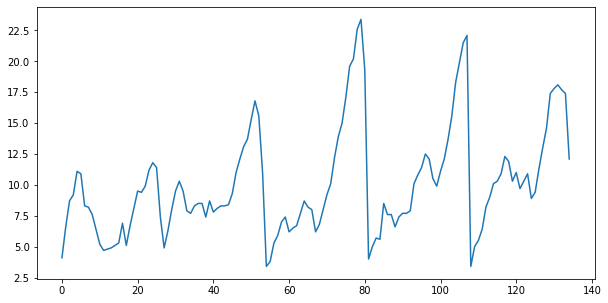

In [4]:
endog = df["Slowness in traffic (%)"]
endog.plot(figsize=(10, 5))

### SPLIT DATA

In [5]:
train, test = endog.iloc[:-12], endog.iloc[-12:]
train.shape, test.shape, train.index[-1], test.index[0]

((123,), (12,), 122, 123)

### MODEL

In [6]:
p, d, q = 48, 1, 48
model = ARIMA(train, order=(p, d, q))
result = model.fit()

result.mse

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1.4798884099990135

### EVALUATION

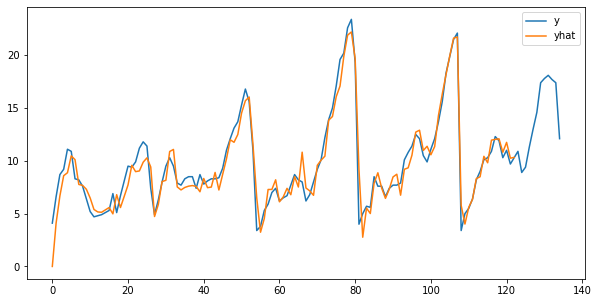

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(endog, label="y")
ax.plot(result.predict(), label="yhat")
ax.legend()
plt.show()

### PREDICT

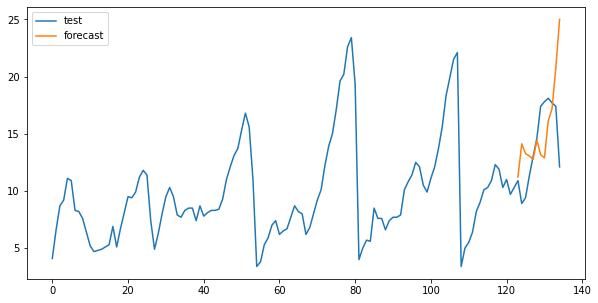

In [8]:
forecast = result.predict(start=test.index[0], end=test.index[-1], dynamic=True)
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(endog, label="test")
ax.plot(forecast, label="forecast")
ax.legend()
plt.show()